<a href="https://colab.research.google.com/github/hanifahputrr/stockpriceprediction/blob/main/Predicting_Sequential_Data_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Code LSTM - Predicting Sequential Data using LSTM**



**source code**: https://towardsdatascience.com/time-series-forecasting-with-recurrent-neural-networks-74674e289816

**link dataset**: https://finance.yahoo.com/quote/GOOG/history?p=GOOG

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
import plotly.graph_objects as go

**Import Data**

In [ ]:
from google.colab import files
files.upload()

Saving GOOG (4).csv to GOOG (4).csv


{'GOOG (4).csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2012-05-14,299.268280,303.113861,299.168640,300.872253,300.872253,3662477\n2012-05-15,301.544739,306.351715,300.747711,304.413971,304.413971,4219958\n2012-05-16,307.826202,313.873535,306.819977,313.290710,313.290710,9706446\n2012-05-17,315.731567,317.734070,309.455078,310.361694,310.361694,6732742\n2012-05-18,311.382874,315.029205,297.235901,299.078979,299.078979,11991780\n2012-05-21,299.133759,306.695435,298.879730,305.908386,305.908386,6173855\n2012-05-22,305.574646,305.758942,296.887207,299.278229,299.278229,6126679\n2012-05-23,299.701660,303.661804,297.445099,303.592072,303.592072,6380025\n2012-05-24,303.442627,304.817474,298.316833,300.702881,300.702881,3796778\n2012-05-25,299.377869,299.741486,293.041595,294.660553,294.660553,7190652\n2012-05-29,296.792542,298.446350,293.061523,296.060303,296.060303,5230934\n2012-05-30,292.981842,294.844849,290.675476,293.016693,293.016693,3827694\n2012-05-31,293.260773,293.898407,288.

In [ ]:
df = pd.read_csv('GOOG (4).csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2516 non-null   object 
 1   Open       2516 non-null   float64
 2   High       2516 non-null   float64
 3   Low        2516 non-null   float64
 4   Close      2516 non-null   float64
 5   Adj Close  2516 non-null   float64
 6   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.7+ KB
None


**Drop yang tidak perlu**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_axis(df['Date'], inplace=True)
df.drop(columns=['Open', 'High', 'Low', 'Volume'], inplace=True)

**Data Pre-processing**

In [ ]:
close_data = df['Close'].values
close_data = close_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(close_data))

close_train = close_data[:split]
close_test = close_data[split:]

date_train = df['Date'][:split]
date_test = df['Date'][split:]

print("Jumlah close_train: ", len(close_train))
print("Jumlah close test: ", len(close_test))

Jumlah close_train:  2012
Jumlah close test:  504


**Konsep look back**

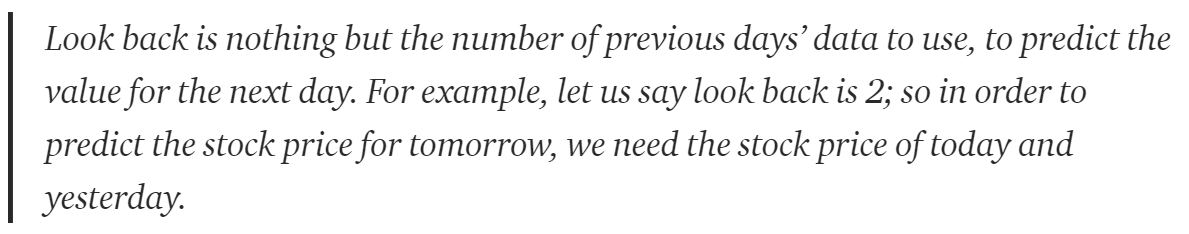



In [ ]:
look_back = 15

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

# **Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 25
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



100/100 [==============================] - 5s 22ms/step - loss: 1287367.2500
Epoch 2/25
100/100 [==============================] - 2s 20ms/step - loss: 758667.9375
Epoch 3/25
100/100 [==============================] - 1s 8ms/step - loss: 911383.8750
Epoch 4/25
100/100 [==============================] - 1s 13ms/step - loss: 699501.6250
Epoch 5/25
100/100 [==============================] - 1s 13ms/step - loss: 493167.8750
Epoch 6/25
100/100 [==============================] - 1s 9ms/step - loss: 196404.8281
Epoch 7/25
100/100 [==============================] - 1s 13ms/step - loss: 7319.7373
Epoch 8/25
100/100 [==============================] - 1s 8ms/step - loss: 1129.4045
Epoch 9/25
100/100 [==============================] - 1s 7ms/step - loss: 1091.1462
Epoch 10/25
100/100 [==============================] - 2s 18ms/step - loss: 1051.8170
Epoch 11/25
100/100 [==============================] - 1s 7ms/step - loss: 1133.6714
Epoch 12/25
100/100 [==============================] - 1s 8ms/step

**Prediksi**

In [ ]:
prediction = model.predict_generator(test_generator)

close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = "Google Stock",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



In [ ]:
close_data = close_data.reshape((-1))

def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]

    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]

    return prediction_list

def predict_dates(num_prediction):
    last_date = df['Date'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 30
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)